# **Project Title :**   Script Recognition via Neural Network(s)

# **Team Memebers**


*   Sebastian Koch 
*   Manpreet Singh
*   Adnan Nooruddin
*   Rahima Akter


# **CNN** (Convolutional Neural Networks)

# Two Languages classification 

In [ ]:
#------------------------------------------------
# Load Libraries
#------------------------------------------------
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import shutil
from shutil import copyfile 

In [ ]:
#------------------------------------------------
# Upload Lat_Sin.zip in Colab sample_data
#------------------------------------------------
local_zip = '/content/sample_data/Lat_Sin.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()  

In [ ]:
try:
    #-------------------------------------
    #Create folder for testing and trining
    #--------------------------------------
    os.mkdir('/tmp/Lat_v_Sin') 
    os.mkdir('/tmp/Lat_v_Sin/training')  
    os.mkdir('/tmp/Lat_v_Sin/training/lat') 
    os.mkdir('/tmp/Lat_v_Sin/training/sin')  
    os.mkdir('/tmp/Lat_v_Sin/testing') 
    os.mkdir('/tmp/Lat_v_Sin/testing/lat')  
    os.mkdir('/tmp/Lat_v_Sin/testing/sin') 
except OSError:
    pass

#---------------------------------------------------------------------------
# Define a Callback class that stops training once accuracy reaches 90.0%
#---------------------------------------------------------------------------
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if(logs['acc']>0.90):
            print("\nReached 90.0% accuracy so cancelling training!")
            self.model.stop_training = True

#--------------------------------------------------------------------------
# Define a split data function that split item for testing and training 
#--------------------------------------------------------------------------
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    file_contents=os.listdir(SOURCE)
    files=[]
    for i in range(len(file_contents)):
        if(os.path.getsize(SOURCE+file_contents[i])==0):
            print(file_contents[i]+" is zero length, so ignoring")
        else:
            files.append(file_contents[i])
            
    training_length=int(len(files)*SPLIT_SIZE)
    testing_length=int(len(files)-training_length)
    shuffled_set=random.sample(files,len(files))
    training_set=shuffled_set[0:training_length]
    testing_set=shuffled_set[-testing_length:]
    for file in training_set:
        copyfile(SOURCE+file,TRAINING+file)
    for file in testing_set:
        copyfile(SOURCE+file,TESTING+file)    


LAT_SOURCE_DIR = "/tmp/Lat_Sin/Lat/"
TRAINING_LAT_DIR = "/tmp/Lat_v_Sin/training/sin/"
TESTING_LAT_DIR = "/tmp/Lat_v_Sin/testing/sin/"
SIN_SOURCE_DIR = "/tmp/Lat_Sin/Lat/"
TRAINING_SIN_DIR = "/tmp/Lat_v_Sin/training/lat/"
TESTING_SIN_DIR = "/tmp/Lat_v_Sin/testing/lat/"

split_size = .833
split_data(LAT_SOURCE_DIR, TRAINING_LAT_DIR, TESTING_LAT_DIR, split_size)
split_data(SIN_SOURCE_DIR, TRAINING_SIN_DIR, TESTING_SIN_DIR, split_size)        

In [ ]:
#------------------------------------------------
# print How many image for testing and training
#------------------------------------------------
print(len(os.listdir('/tmp/Lat_v_Sin/training/sin/')))
print(len(os.listdir('/tmp/Lat_v_Sin/testing/sin/')))

#------------------------------------------------
# 3 convolution layers, 1 flatten and dense layer
#------------------------------------------------
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32,(3,3),activation='tanh'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation='tanh'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.01), loss='binary_crossentropy', metrics=['acc'])


TRAINING_DIR = '/tmp/Lat_v_Sin/training/' 
train_datagen = ImageDataGenerator(rescale=1/255)
# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = '/tmp/Lat_v_Sin/testing/' 
validation_datagen = ImageDataGenerator(rescale=1/255) 
# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,batch_size=15,
                                                    class_mode='binary',
                                                    target_size=(150, 150)) 

299
129
Found 596 images belonging to 2 classes.
Found 249 images belonging to 2 classes.


In [ ]:
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator, 
                    steps_per_epoch=15,
                    epochs = 100, 
                    verbose = 1, 
                    validation_steps=3,
                    callbacks=[callbacks])

Epoch 1/100
15/15 [==============================] - 1s 46ms/step - loss: 28.4150 - acc: 0.4884 - val_loss: 0.8099 - val_acc: 0.5111
Epoch 2/100
15/15 [==============================] - 1s 36ms/step - loss: 0.8200 - acc: 0.4560 - val_loss: 0.6847 - val_acc: 0.5778
Epoch 3/100
15/15 [==============================] - 1s 35ms/step - loss: 0.7139 - acc: 0.4431 - val_loss: 0.7058 - val_acc: 0.4889
Epoch 4/100
15/15 [==============================] - 1s 35ms/step - loss: 0.8665 - acc: 0.4992 - val_loss: 2.9077 - val_acc: 0.4889
Epoch 5/100
15/15 [==============================] - 1s 35ms/step - loss: 3.4854 - acc: 0.4713 - val_loss: 0.6886 - val_acc: 0.5556
Epoch 6/100
15/15 [==============================] - 1s 34ms/step - loss: 0.7052 - acc: 0.4851 - val_loss: 0.6930 - val_acc: 0.4667
Epoch 7/100
15/15 [==============================] - 1s 35ms/step - loss: 0.6950 - acc: 0.4926 - val_loss: 0.6924 - val_acc: 0.5111
Epoch 8/100
15/15 [==============================] - 1s 36ms/step - loss: 6

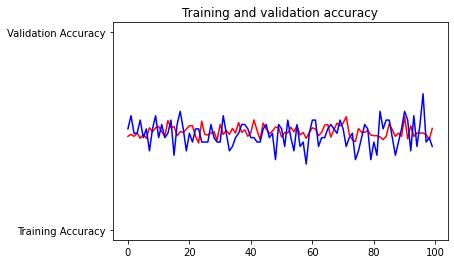

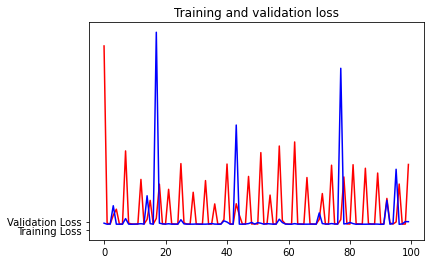

In [ ]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))  

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. 

#------------------------------------------------
# Load Libraries for testing
#------------------------------------------------
import numpy as np
from google.colab import files
from keras.preprocessing import image

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=15)
  print(fn)  
  #------------------------------------------------
  #LAT (...).png  [[0. 1.]] 
  #SIN (...).png  [[1. 0.]] 
  #------------------------------------------------
  print(classes)

# Four Languages classification

In [ ]:
#------------------------------------------------
# Load Libraries
#------------------------------------------------
from google.colab import files
import numpy as np
from keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import os
import cv2
import zipfile

In [ ]:
#------------------------------------------------
# Upload Zip File, MultiLang.zip
#------------------------------------------------
uploaded = files.upload()

Saving MultiLang.zip to MultiLang.zip


In [ ]:
local_zip ='/content/MultiLang.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/MultiLang')
zip_ref.close()

Latin_dir = os.path.join('/content/MultiLang/5_for_Keras_Train500_Test100 _ LAT _ SIN _ KYR _ GEO/Training/LAT')
Geo_dir = os.path.join('/content/MultiLang/5_for_Keras_Train500_Test100 _ LAT _ SIN _ KYR _ GEO/Training/GEO')
Kyr_dir = os.path.join('/content/MultiLang/5_for_Keras_Train500_Test100 _ LAT _ SIN _ KYR _ GEO/Training/KYR')
Chi_dir = os.path.join('/content/MultiLang/5_for_Keras_Train500_Test100 _ LAT _ SIN _ KYR _ GEO/Training/SIN')

#---------------------------------------------------
# Print number of images
#---------------------------------------------------
print('total training Latin images:', len(os.listdir(Latin_dir)))
print('total training Geo images:', len(os.listdir(Geo_dir)))
print('total training KYR images:', len(os.listdir(Kyr_dir)))
print('total training Chi images:', len(os.listdir(Chi_dir)))

#---------------------------------------------------
# Print 10 training images name per languages
#---------------------------------------------------
Latin_files = os.listdir(Latin_dir)
print(Latin_files[:10])

Geo_files = os.listdir(Geo_dir)
print(Geo_files[:10])

Kyr_files = os.listdir(Kyr_dir)
print(Kyr_files[:10])

Chi_files = os.listdir(Chi_dir)
print(Chi_files[:10])

total training Latin images: 500
total training Geo images: 500
total training KYR images: 500
total training Chi images: 500
['LAT (197).png', 'LAT (147).png', 'LAT (4).png', 'LAT (186).png', 'LAT (313).png', 'LAT (302).png', 'LAT (346).png', 'LAT (57).png', 'LAT (7).png', 'LAT (451).png']
['GEO (149).png', 'GEO (195).png', 'GEO (101).png', 'GEO (439).png', 'GEO (222).png', 'GEO (436).png', 'GEO (138).png', 'GEO (451).png', 'GEO (92).png', 'GEO (131).png']
['KYR (393).png', 'KYR (5).png', 'KYR (312).png', 'KYR (16).png', 'KYR (415).png', 'KYR (360).png', 'KYR (186).png', 'KYR (94).png', 'KYR (306).png', 'KYR (369).png']
['SIN (402).png', 'SIN (66).png', 'SIN (424).png', 'SIN (488).png', 'SIN (95).png', 'SIN (222).png', 'SIN (338).png', 'SIN (56).png', 'SIN (489).png', 'SIN (209).png']


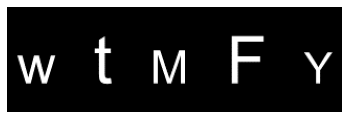

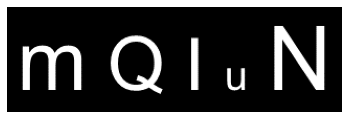

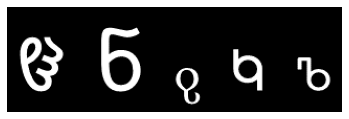

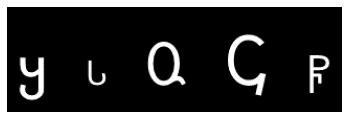

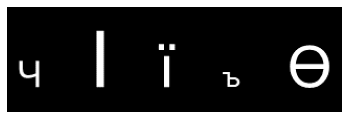

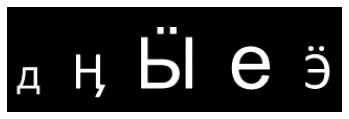

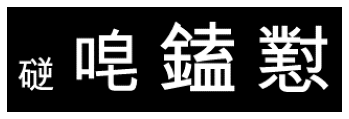

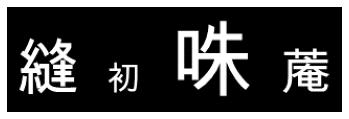

In [ ]:
#----------------------------------------------
# print 2 images from each languages
#----------------------------------------------
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_Latin = [os.path.join(Latin_dir, fname) 
                 for fname in Latin_files[pic_index-2:pic_index]]
next_Geo = [os.path.join(Geo_dir, fname) 
                for fname in Geo_files[pic_index-2:pic_index]]
next_Kyr = [os.path.join(Kyr_dir, fname) 
                for fname in Kyr_files[pic_index-2:pic_index]]
next_Chi = [os.path.join(Chi_dir, fname) 
                for fname in Chi_files[pic_index-2:pic_index]]


for i, img_path in enumerate(next_Latin+next_Geo+next_Kyr+next_Chi):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

#-----------------------------------------------------------------------
# Define a Callback class that stops training once accuracy reaches 97.0%
#------------------------------------------------------------------------
class stop_training(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if(logs['accuracy']>0.90):
            print("\nReached 90.0% accuracy so cancelling training!")
            self.model.stop_training = True

#---------------------------------------------------------
# Use image Augmentation for training
#--------------------------------------------------------
TRAINING_DIR = "/content/MultiLang/5_for_Keras_Train500_Test100 _ LAT _ SIN _ KYR _ GEO/Training"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/MultiLang/5_for_Keras_Train500_Test100 _ LAT _ SIN _ KYR _ GEO/Validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(320, 100),
	class_mode='categorical',
  batch_size= 20
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(320, 100),
	class_mode='categorical',
  batch_size= 20
)

#----------------------------------------------------------------------
# 4 convolution layers, 1 Flatten layer, 1 Dropout layer and 2 Dense layers
#----------------------------------------------------------------------
model = tf.keras.models.Sequential([ 
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(320, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer=RMSprop(lr=0.0001), metrics=['accuracy'])

callbacks = stop_training()
history = model.fit(train_generator, epochs=73, steps_per_epoch=15, validation_data = validation_generator, verbose = 0, validation_steps=3,callbacks=[callbacks])


model.save("rps.h5")


In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

#------------------------------------------------
# Load Libraries for testing
#------------------------------------------------
import numpy as np
from google.colab import files
from keras.preprocessing import image

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(320, 100))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  #-----------------------------------------------------------
  # Sample of Results
  #-----------------------------------------------------------
  #GEO (...).png  [[1. 0. 0. 0.]] 
  #KYR (...).png  [[0. 1. 0. 0.]] 
  #LAT (...).png  [[0. 0. 1. 0.]] 
  #SIN (...).png  [[0. 0. 0. 1.]] 
  print(classes)

# Future Work



1.   Improve test accuracy and validation accuracy

